**InsideAirbnb - Toronto - Exploratory Data Analysis**

**Descriptions**

- `calendar.csv.gz` -> Detailed Calendar Data for listings in Toronto
- `reviews.csv.gz` ->	Detailed Review Data for listings in Toronto
- `listings.csv.gz` ->	Detailed Listings data for Toronto
- `listings.csv` ->	Summary information and metrics for listings in Toronto _(good for visualisations)_
- `neighbourhoods.csv` ->	Neighbourhood list for geo filter. Sourced from city or open source GIS files

In [ ]:
# Loading the "autoreload" extension so that code can change
# Always reload modules so that as soon as code changes in source, it gets automatically reloaded without kernel relaunch
%load_ext autoreload
%autoreload 2

**Importing the required libraries**

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.9 MB/s 
     |████████████████████████████████| 6.3 MB 60.0 MB/s 
     |████████████████████████████████| 16.7 MB 46.9 MB/s 


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import geopandas as gpd
from datetime import datetime
from pathlib import Path

%matplotlib inline

**Setting the path**

In [ ]:
path = "/content/"
os.chdir(path)

**Rows and Columns for each file**

In [ ]:
LISTING_FULL_FILE = "listings.csv.gz"
LISTING_LIGHT_FILE = "listings.csv"
CALENDAR_FILE = "calendar.csv.gz"
REVIEWS_FILE = "reviews.csv.gz"
NEIGHBOURHOODS_FILE = "neighbourhoods.csv"

In [ ]:
file_list = [LISTING_FULL_FILE, LISTING_LIGHT_FILE, CALENDAR_FILE, REVIEWS_FILE, NEIGHBOURHOODS_FILE]
for f in file_list:
    compression = 'gzip' if f.endswith(".gz") else 'infer'
    df = pd.read_csv(os.path.join(path, f), sep=',', header=0, compression=compression, low_memory=False)
    print("File {} has shape {}".format(f, df.shape))

File listings.csv.gz has shape (16035, 75)
File listings.csv has shape (16035, 18)
File calendar.csv.gz has shape (5852427, 7)
File reviews.csv.gz has shape (445797, 6)
File neighbourhoods.csv has shape (140, 2)


**Observations:**

- Files `listings.csv` and `listings.csv.gz` are consistent in terms of **rows**, just the number of **columns** that changes. As per the files descriptions, the first one is a summary of the second, so _this is expected_.

- `calendar.csv.gz` file is the one that contains the most important number of rows (58 million lines approx!)

- `reviews.csv.gz` file has also a lot of rows, more than four million and a few columns.

- `neighbourhoods.csv` file is very small with only 140 rows, which is not a big surprise as per file description

**Starting off the analysis with `Listings` since `Calendar` and `Reviews` are also related to `Listings`**

In [ ]:
df = pd.read_csv(LISTING_LIGHT_FILE, sep=',', header=0)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,27640141,Fibre internet*Monthly Discount*Character House,2343887,Liora,NaN,Dovercourt-Wallace Emerson-Junction,43.66434,-79.42496,Entire home/apt,90,28,47,2022-06-13,0.95,2,145,4,NaN
1,27647117,Cozy studio in an amazing neighbourhood!,96809956,Alexandra,NaN,Playter Estates-Danforth,43.67943,-79.34853,Entire home/apt,45,28,4,2021-02-06,0.08,1,0,0,NaN
2,27826009,Downtown condo,17410774,Brianne,NaN,Waterfront Communities-The Island,43.64698,-79.39121,Entire home/apt,130,28,2,2018-09-09,0.04,1,0,0,NaN
3,27647509,Dundas west subway station apartment BEST LOCA...,179249078,Rosana,NaN,High Park North,43.65953,-79.45416,Private room,80,28,9,2019-03-20,0.19,1,0,0,NaN
4,27653375,Exquisite 1200 sqft 3BR + Den in core-downtown,135718015,Ayk,NaN,Waterfront Communities-The Island,43.64126,-79.38277,Entire home/apt,1999,28,20,2021-06-24,0.42,37,179,0,STR-2204-HLPVHK


In [ ]:
df.shape

(16035, 18)

**Basic Understanding of the Data**

We have **18 features** that describe what is a listing and give information about:

- Who it belongs to (`host_id` and `host_name`)
- Its `name` (or headline for advertisement - some text probably written by the owner) and an `id` (numeric) (probably unique within the Information System)
- Its `location` - some elements about neighbourhood and geographic coordinates `latitude` + `longitude`.
- Its type (`room_type`) - Here, all values are the same so perhaps they come from a defined and finite list
- The `price` (numeric)
- `minimum number of nights` - to stay
- Data about reviews: `number of reviews` for this listing, last time it has been reviewed and a statistic value
- `calculated_host_listings_count` - seems numeric but no real clue so far of what is means
- `availability_365` - the number of days it is available in a whole year
- `license` - weather the owner is licensed or not!

**Data Information Overview**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16035 entries, 0 to 16034
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16035 non-null  int64  
 1   name                            16033 non-null  object 
 2   host_id                         16035 non-null  int64  
 3   host_name                       16033 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   16035 non-null  object 
 6   latitude                        16035 non-null  float64
 7   longitude                       16035 non-null  float64
 8   room_type                       16035 non-null  object 
 9   price                           16035 non-null  int64  
 10  minimum_nights                  16035 non-null  int64  
 11  number_of_reviews               16035 non-null  int64  
 12  last_review                     

**Observations:**

- There are few missing values in this dataset, only `neighbourhood_group` which has only (or all) missing values (so what is the purpose of providing this column?)
- The other columns which contains missing values are the ones about reviews and license, probably the listings which hasnt recived any reviews (probably new listing) and listings which doesnt have a license.

**Numerical Analysis**

In [ ]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.603500e+04,1.603500e+04,0.0,16035.000000,16035.000000,16035.000000,16035.000000,16035.000000,12640.000000,16035.000000,16035.000000,16035.000000
mean,1.415557e+17,1.448429e+08,NaN,43.684916,-79.396946,205.232679,25.197630,27.801497,1.445146,5.448145,139.112317,7.625569
std,2.677914e+17,1.410097e+08,NaN,0.052253,0.071079,349.268699,37.165404,55.838458,1.900710,13.894427,134.301950,16.312252
min,1.419000e+03,1.565000e+03,NaN,43.573810,-79.653650,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.067456e+07,2.527900e+07,NaN,43.646021,-79.426990,80.000000,3.000000,1.000000,0.190000,1.000000,0.000000,0.000000
50%,3.832875e+07,9.448940e+07,NaN,43.664550,-79.396650,130.000000,28.000000,6.000000,0.670000,1.000000,90.000000,1.000000
75%,5.336650e+07,2.420599e+08,NaN,43.710365,-79.373120,226.000000,28.000000,28.000000,2.000000,4.000000,276.000000,6.000000
max,7.102781e+17,4.783676e+08,NaN,43.860710,-79.102200,13164.000000,1125.000000,828.000000,13.470000,129.000000,365.000000,165.000000


**Observations & Related Statistics:**

- `price`: mean value is 205 with an impressive max value (13164!)

- `minimum_nights`: the mean is around 25 days (so around three weeks).

- Each listing got around 27 reviews (mean), some of them have no review (min = 0) which explains why we have seen missing values earlier and max number of reviews a listing has received is 828 reviews!

- There is high variance in this feature (as per shown also by the standard deviation value). 

**Some Other Facts & Figures**

- `minimum_nights`: the max is around 1125 days! Outliers?!

- If my intuition about `calculated_host_listings_count` is right, that would mean that someone has 5 homes/apartments on average to rent in Toronto. Impressive business!


**Moving on to `Neighbourhoods`**

In [ ]:
df.neighbourhood.nunique()

140

**So, 140 different / unique values for the neighbourhood. Probably `Categorical` values!**

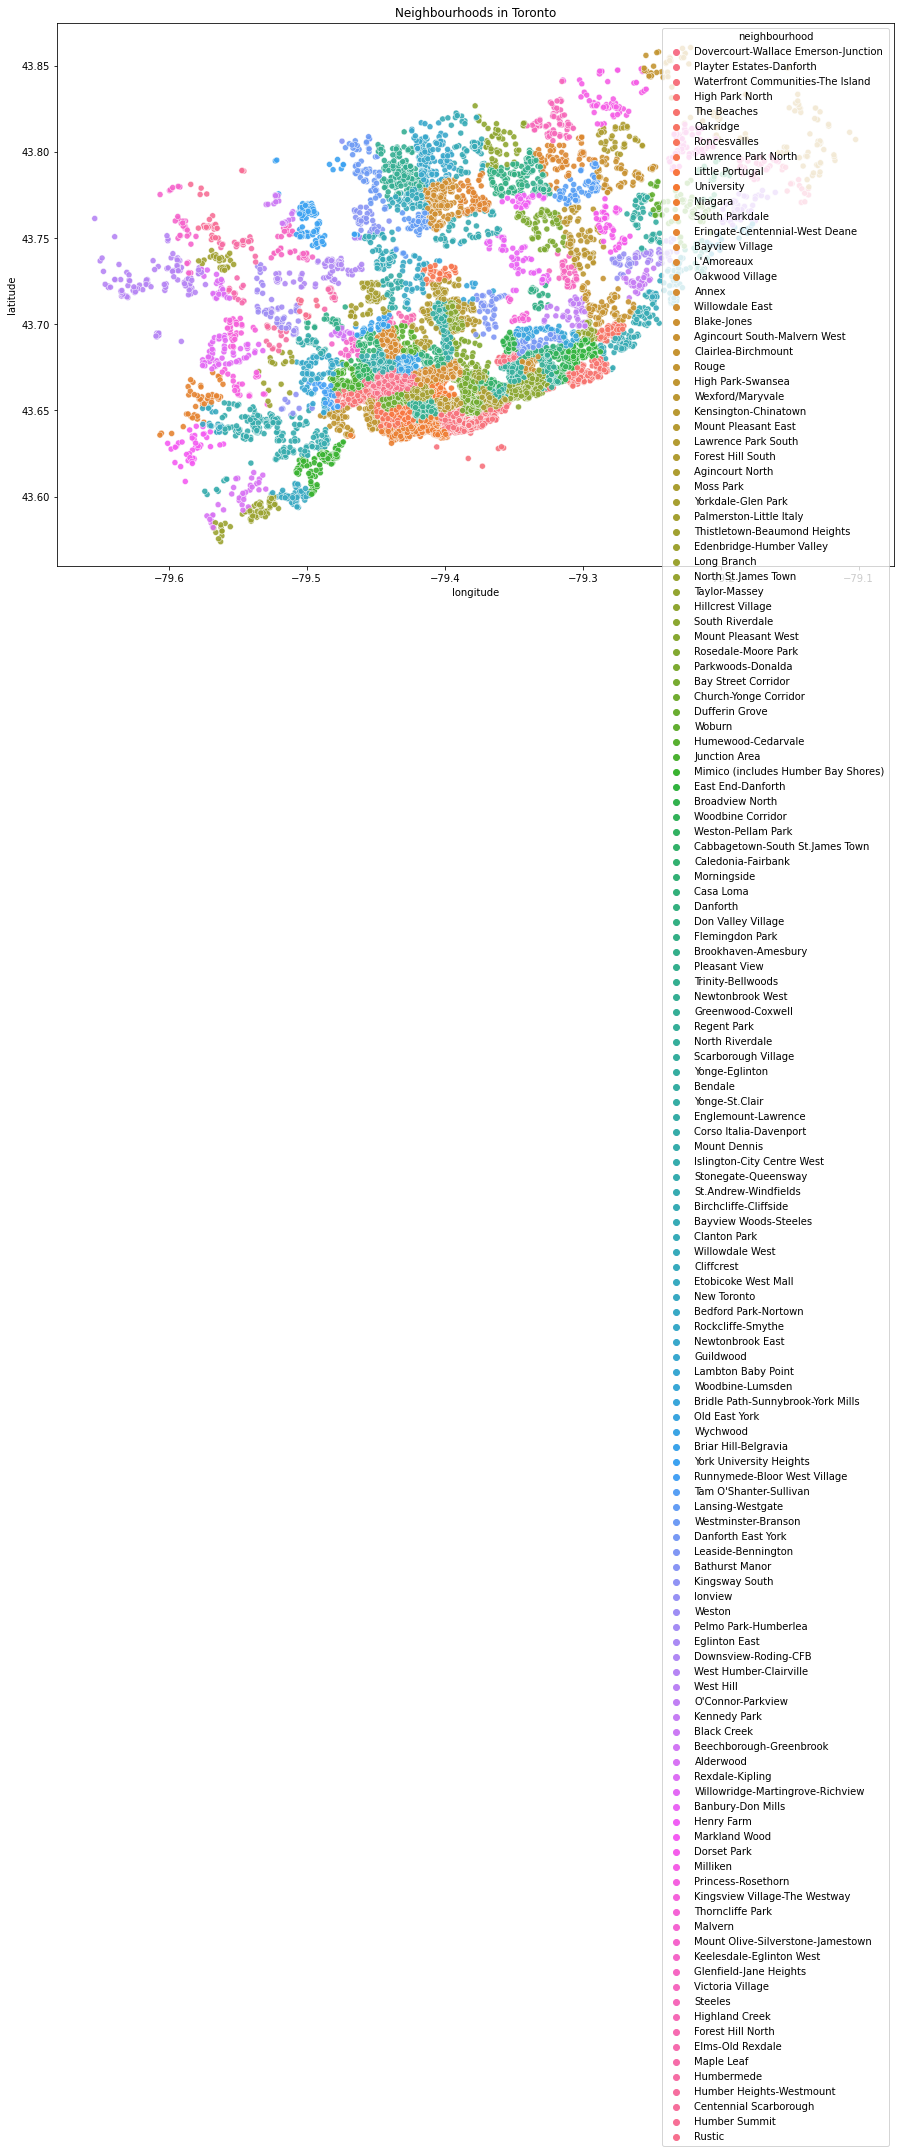

In [ ]:
figure, axis = plt.subplots(1, 1, figsize=(15, 10))
axis.set_title("Neighbourhoods in Toronto")
sns.scatterplot(x="longitude", y="latitude", hue='neighbourhood', data=df, alpha=0.9, palette=None, ax=axis)
plt.show()

**Moving on to `Calendar` Data**

In [ ]:
df_cal = pd.read_csv(CALENDAR_FILE, sep=',', header=0)
df_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,533659,2022-09-08,f,$220.00,$220.00,14.0,1125.0
1,533659,2022-09-09,f,$240.00,$240.00,14.0,1125.0
2,533659,2022-09-10,f,$240.00,$240.00,14.0,1125.0
3,533659,2022-09-11,f,$220.00,$220.00,14.0,1125.0
4,533659,2022-09-12,f,$220.00,$220.00,14.0,1125.0


In [ ]:
df_cal.shape

(5852427, 7)

**We have 7 features to describe what is a calendar:**

- `listing_id`: seems to be a reference to listings we have. (Can merge two datasets based on `id`)
- `date`: format is `yyyy-mm-dd` 
- 2 features for the `price` and `adjusted_price`: values are the same for the first rows. Always the case? Note that the currency is USD even if it should be CAD
- `minimum number of nights` and `maximum number of nights to stay`, as already seen previously.
- `price` values are not numeric, needs the symbol to be removed and then converted to numeric

In [ ]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852427 entries, 0 to 5852426
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 312.6+ MB


In [ ]:
df_cal.isna().sum()

listing_id          0
date                0
available           0
price             364
adjusted_price    364
minimum_nights    357
maximum_nights    357
dtype: int64

**Further Analysis**

In [ ]:
print("Date range: the dataset contains information from {} to {}".format(df_cal.date.min(), df_cal.date.max()))
print("We have {} different listings in the dataset".format(df_cal.listing_id.nunique()))

Date range: the dataset contains information from 2022-09-07 to 2023-09-07
We have 16035 different listings in the dataset


In [ ]:
df_price_diff = df_cal[df_cal['price'] != df_cal['adjusted_price']]
print("{} rows have different values for 'price' and 'adjusted_price'".format(df_price_diff.shape[0]))

111255 rows have different values for 'price' and 'adjusted_price'


In [ ]:
df_price_diff.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
4380,27701168,2022-09-07,f,$700.00,$665.00,1.0,1125.0
4381,27701168,2022-09-08,f,$700.00,$665.00,2.0,1125.0
4440,27701168,2022-11-06,t,$415.00,$394.00,1.0,1125.0
4441,27701168,2022-11-07,t,$415.00,$394.00,1.0,1125.0
4442,27701168,2022-11-08,t,$415.00,$394.00,1.0,1125.0


***A Discount might be a possible explanation for the price difference***

- Example: 5% discount on 700 gives 665 approx!!

In [ ]:
df_cal.available.value_counts()

f    3620772
t    2231655
Name: available, dtype: int64

**Stands for 'False'/'True'. This will be easily transformed as binary column 0/1**

In [ ]:
df_cal.describe()

,listing_id,minimum_nights,maximum_nights
count,5.852427e+06,5.852070e+06,5.852070e+06
mean,1.415642e+17,2.540074e+01,4.033434e+05
std,2.677889e+17,3.749197e+01,2.939934e+07
min,1.419000e+03,1.000000e+00,1.000000e+00
25%,2.067404e+07,4.000000e+00,3.650000e+02
50%,3.832875e+07,2.800000e+01,1.125000e+03
75%,5.336684e+07,2.800000e+01,1.125000e+03
max,7.102781e+17,1.125000e+03,2.147484e+09


- `Availability` is missing because it is categorical (f/t) and not numerical (0/1)
- `price` missing because not numeric - removed currency symbol
- `Maximum` and `Minimum` nights - values are crazy! 

**Review Files**

In [ ]:
df_reviews = pd.read_csv(REVIEWS_FILE, sep=',', header=0)
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1419,38924112,2015-07-19,11308465,Marcela,Having the opportunity of arriving to Alexandr...
1,1419,44791978,2015-08-29,9580285,Marco,We have no enough words to describe how beauty...
2,1419,45957133,2015-09-07,38394721,Andrea,The listing was exceptional and an even better...
3,1419,67295154,2016-03-28,3515044,Shaun,Alexandra's home was amazing and in such a nea...
4,1419,177702208,2017-08-03,13987100,Kate,Beautiful home. Very comfortable and clean. Pe...


In [ ]:
df_reviews.shape

(445797, 6)

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445797 entries, 0 to 445796
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     445797 non-null  int64 
 1   id             445797 non-null  int64 
 2   date           445797 non-null  object
 3   reviewer_id    445797 non-null  int64 
 4   reviewer_name  445797 non-null  object
 5   comments       445743 non-null  object
dtypes: int64(3), object(3)
memory usage: 20.4+ MB


In [ ]:
df_reviews.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         54
dtype: int64

**Neighbourhoods File**

In [ ]:
df_neigh = pd.read_csv(NEIGHBOURHOODS_FILE, sep=',', header=0)
df_neigh.head()

,neighbourhood_group,neighbourhood
0,NaN,Agincourt North
1,NaN,Agincourt South-Malvern West
2,NaN,Alderwood
3,NaN,Annex
4,NaN,Banbury-Don Mills


In [ ]:
df_neigh.head(20)

,neighbourhood_group,neighbourhood
0,NaN,Agincourt North
1,NaN,Agincourt South-Malvern West
2,NaN,Alderwood
3,NaN,Annex
4,NaN,Banbury-Don Mills
5,NaN,Bathurst Manor
6,NaN,Bay Street Corridor
7,NaN,Bayview Village
8,NaN,Bayview Woods-Steeles
9,NaN,Bedford Park-Nortown


This dataset is actually the whole list of neighbourhoods. One column if full of NaN so it will be totally useless for us.



**Full Listing File: Listing Details Analysis -> listing.csv.gz**

In [ ]:
df_lst_full = pd.read_csv(LISTING_FULL_FILE, sep=',', header=0, low_memory=False)
df_lst_full.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27640141,https://www.airbnb.com/rooms/27640141,20220907151536,2022-09-07,city scrape,Fibre internet*Monthly Discount*Character House,Monthly and longer stays welcome! New desk & o...,Within one block walking you will be on Bloor ...,https://a0.muscache.com/pictures/89a05e34-3549...,2343887,...,4.89,4.89,4.77,NaN,f,2,2,0,0,0.95
1,27826009,https://www.airbnb.com/rooms/27826009,20220907151536,2022-09-08,previous scrape,Downtown condo,Welcome to the heart of the city! Located in t...,It is a beautiful neighbourhood filled with up...,https://a0.muscache.com/pictures/6e7c51ed-320d...,17410774,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.04
2,27647117,https://www.airbnb.com/rooms/27647117,20220907151536,2022-09-08,previous scrape,Cozy studio in an amazing neighbourhood!,The studio apartment is in Greek Town on The D...,NaN,https://a0.muscache.com/pictures/c3a558bd-0918...,96809956,...,5.00,5.00,4.75,NaN,f,1,1,0,0,0.08
3,27647509,https://www.airbnb.com/rooms/27647509,20220907151536,2022-09-08,previous scrape,Dundas west subway station apartment BEST LOCA...,It is a two bedrooms apartment on the ground f...,Familiar building,https://a0.muscache.com/pictures/81f1eb2f-9a0b...,179249078,...,4.88,5.00,4.75,NaN,t,1,0,1,0,0.19
4,27653375,https://www.airbnb.com/rooms/27653375,20220907151536,2022-09-08,city scrape,Exquisite 1200 sqft 3BR + Den in core-downtown,Exquisite 1200 sqft 3 Bedroom + Den Condo in c...,The building is connected indoors via the PATH...,https://a0.muscache.com/pictures/073dc44e-a9a5...,135718015,...,5.00,4.85,4.85,STR-2204-HLPVHK,f,37,37,0,0,0.42


In [ ]:
df_lst_full.shape

(16035, 75)

In [ ]:
df_lst_full.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

**Dropping Non-Useful Columns**

In [ ]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
df_lst_full = df_lst_full.drop(cols_to_drop, axis=1)

**NULL Values**

In [ ]:
df_lst_full.isna().sum()

id                                                  0
source                                              0
host_since                                          2
host_response_time                               4778
host_response_rate                               4778
host_acceptance_rate                             4563
host_is_superhost                                   1
host_listings_count                                 2
host_total_listings_count                           2
host_has_profile_pic                                2
host_identity_verified                              2
neighbourhood                                    6505
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    16035
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                

In [ ]:
df_lst_full.drop(['host_acceptance_rate', 'neighbourhood_group_cleansed', 'license'], axis=1, inplace=True)
# The id will be used as the index, as this could be useful in future e.g. if a separate dataset containing reviews for each property is linked to this one
df_lst_full.set_index('id', inplace=True) 

In [ ]:
df_lst_full.drop(['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

In [ ]:
sum((df_lst_full.minimum_nights == df_lst_full.minimum_minimum_nights) == False)

742

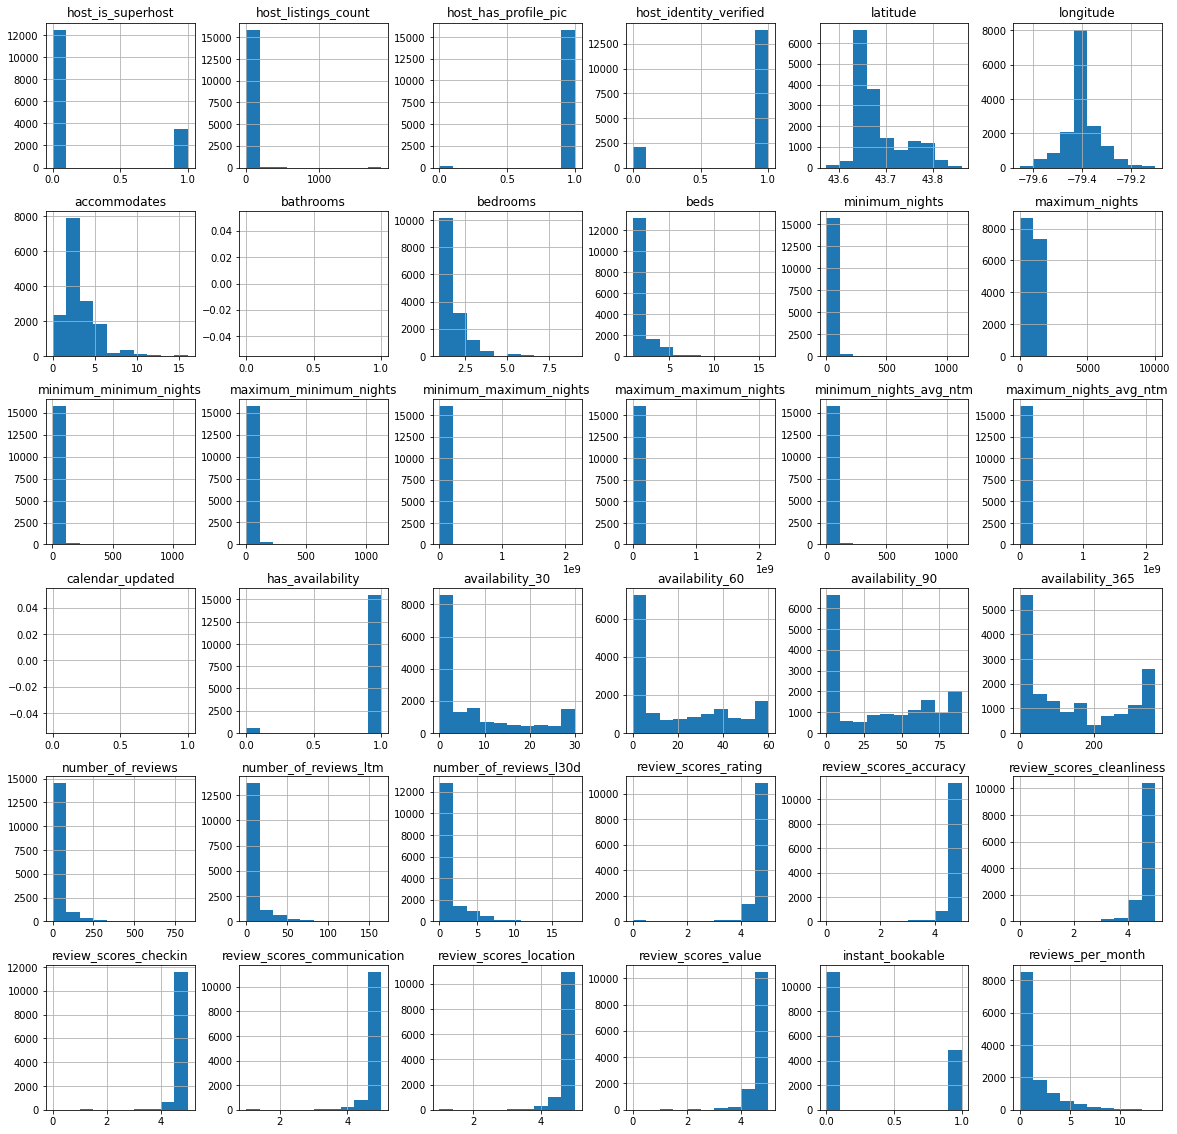

In [ ]:
# Replacing columns with f/t with 0/1
df_lst_full.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df_lst_full.hist(figsize=(20,20));

**Host Since**

In [ ]:
# Converting to datetime
df_lst_full.host_since = pd.to_datetime(df_lst_full.host_since) 

# Calculating the number of days
df_lst_full['host_days_active'] = (datetime(2019, 4, 9) - df_lst_full.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df_lst_full['host_days_active'].mean(),0))
print("Median days as host:", df_lst_full['host_days_active'].median())

# Replacing null values with the median
df_lst_full.host_days_active.fillna(df_lst_full.host_days_active.median(), inplace=True)

Mean days as host: 850.0
Median days as host: 938.0


**Host Response Time**

In [ ]:
print("Null values:", df_lst_full.host_response_time.isna().sum())
print(f"Proportion: {round((df_lst_full.host_response_time.isna().sum()/len(df_lst_full))*100, 1)}%")

Null values: 4778
Proportion: 29.8%


In [ ]:
df_lst_full.host_response_time.fillna("unknown", inplace=True)
df_lst_full.host_response_time.value_counts(normalize=True)

within an hour        0.459183
unknown               0.297973
within a few hours    0.131151
within a day          0.079202
a few days or more    0.032491
Name: host_response_time, dtype: float64

In [ ]:
df_lst_full.host_response_time.value_counts(normalize=True)

within an hour        0.459183
unknown               0.297973
within a few hours    0.131151
within a day          0.079202
a few days or more    0.032491
Name: host_response_time, dtype: float64

**Host Response Rate**

In [ ]:
print("Null values:", df_lst_full.host_response_rate.isna().sum())
print(f"Proportion: {round((df_lst_full.host_response_rate.isna().sum()/len(df_lst_full))*100, 1)}%")

Null values: 4778
Proportion: 29.8%


In [ ]:
# Removing the % sign from the host_response_rate string and converting to an integer
df_lst_full.host_response_rate = df_lst_full.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df_lst_full['host_response_rate'].mean(),0))
print("Median host response rate:", df_lst_full['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df_lst_full.host_response_rate == 100.0).sum()/df_lst_full.host_response_rate.count())*100,1)}%")

Mean host response rate: 93.0
Median host response rate: 100.0
Proportion of 100% host response rates: 72.5%


In [ ]:
# Bin into four categories
df_lst_full.host_response_rate = pd.cut(df_lst_full.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df_lst_full.host_response_rate = df_lst_full.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df_lst_full.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df_lst_full.host_response_rate.value_counts()

100%       8157
unknown    4778
50-89%     1423
90-99%     1062
0-49%       615
Name: host_response_rate, dtype: int64

**Property Type**

In [ ]:
df_lst_full.property_type.value_counts()

Entire condo                 4038
Entire rental unit           2956
Private room in home         2438
Entire home                  2077
Entire guest suite            885
                             ... 
Shared room in guesthouse       1
Shared room in boat             1
Room in bed and breakfast       1
Shared room in barn             1
Earthen home                    1
Name: property_type, Length: 64, dtype: int64

**Bedrooms, Bathrooms and Beds**

In [ ]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    df_lst_full[col].fillna(df_lst_full[col].median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


**First Review and Last Review**

In [ ]:
print(f"Null values in 'first_review': {round(100*df_lst_full.first_review.isna().sum()/len(df_lst_full),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df_lst_full.review_scores_rating .isna().sum()/len(df_lst_full),1)}%")

Null values in 'first_review': 21.2%
Null values in 'review_scores_rating': 21.2%


In [ ]:
# Converting to datetime
df_lst_full.first_review = pd.to_datetime(df_lst_full.first_review) 

# Calculating the number of days between the first review and the date the data was scraped
df_lst_full['time_since_first_review'] = (datetime(2019, 4, 9) - df_lst_full.first_review).astype('timedelta64[D]')

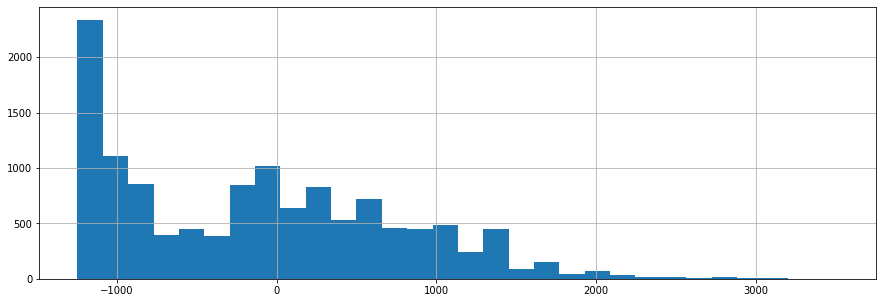

In [ ]:
# Distribution of the number of days since first review
df_lst_full.time_since_first_review.hist(figsize=(15,5), bins=30);

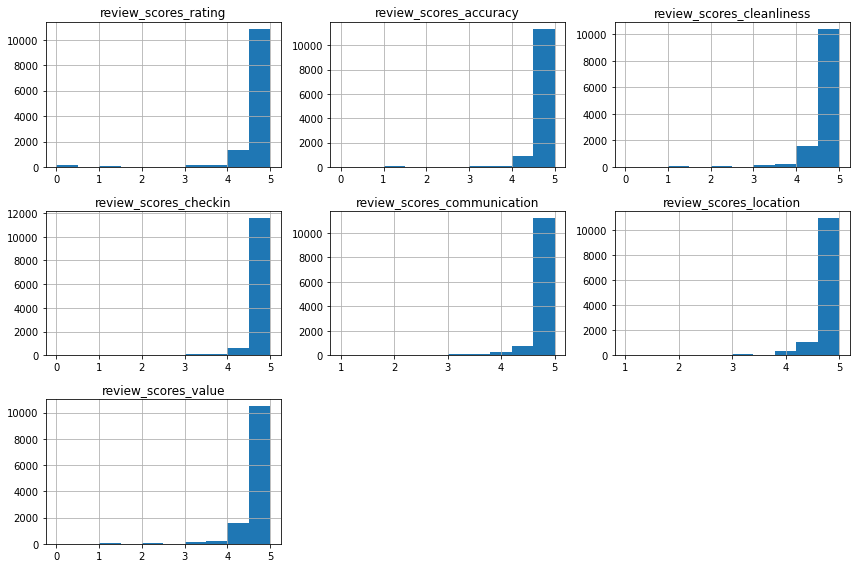

In [ ]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df_lst_full.columns[df_lst_full.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df_lst_full[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

**Price**

In [ ]:
df_lst_full.price = df_lst_full.price.str[1:-3]
df_lst_full.price = df_lst_full.price.str.replace(",", "")
df_lst_full.price = df_lst_full.price.astype('int64')

**Time Series Data Analysis**

In [ ]:
print(f"Of the Airbnb hosts that are still listing on the site, the first joined on {min(df_lst_full.host_since).strftime('%d %B %Y')}, and the most recent joined on {max(df_lst_full.host_since).strftime('%d %B %Y')}.")

Of the Airbnb hosts that are still listing on the site, the first joined on 08 August 2008, and the most recent joined on 06 September 2022.


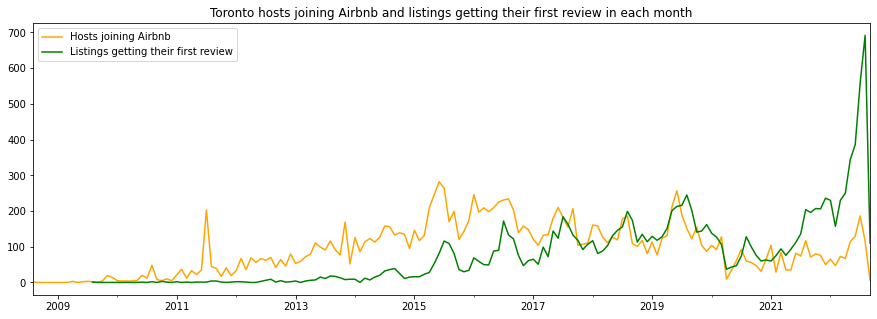

In [ ]:
plt.figure(figsize=(15,5))
df_lst_full.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='orange')
df_lst_full.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='green')
plt.title('Toronto hosts joining Airbnb and listings getting their first review in each month')
plt.legend()
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# Creating dataframes for time series analysis
ts_host_since = pd.DataFrame(df_lst_full.set_index('host_since').resample('MS').size())
ts_first_review = pd.DataFrame(df_lst_full.set_index('first_review').resample('MS').size())

# Renaming columns
ts_host_since = ts_host_since.rename(columns={0: 'hosts'})
ts_host_since.index.rename('month', inplace=True)
ts_first_review = ts_first_review.rename(columns={0: 'reviews'})
ts_first_review.index.rename('month', inplace=True)

In [ ]:
def decompose_time_series(df, title=''):
    """
    Plots the original time series and its decomposition into trend, seasonal and residual.
    """
    # Decomposing the time series
    decomposition = seasonal_decompose(df)
    
    # Getting the trend, seasonality and noise
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plotting the original time series and the decomposition
    plt.figure(figsize=(12,8))
    plt.suptitle(title, fontsize=14, y=1)
    plt.subplots_adjust(top=0.80)
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()

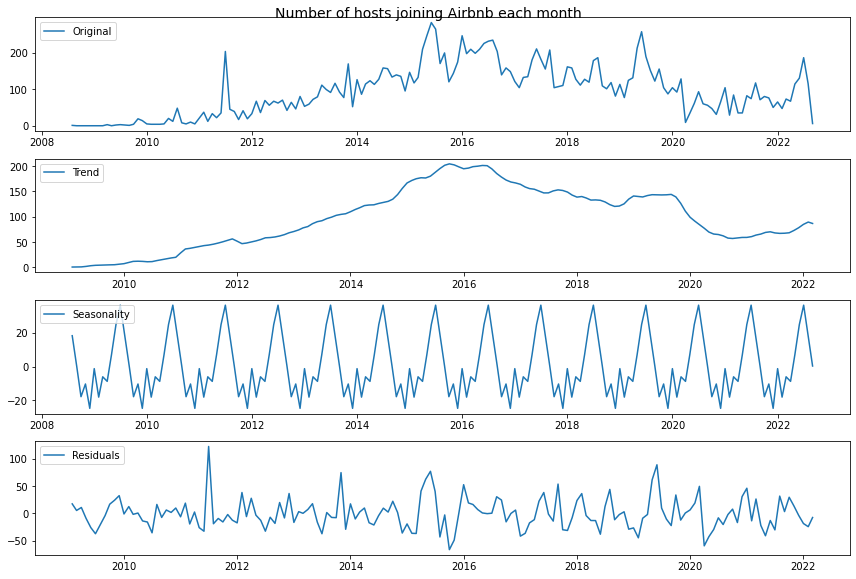

In [ ]:
decompose_time_series(ts_host_since, title='Number of hosts joining Airbnb each month')

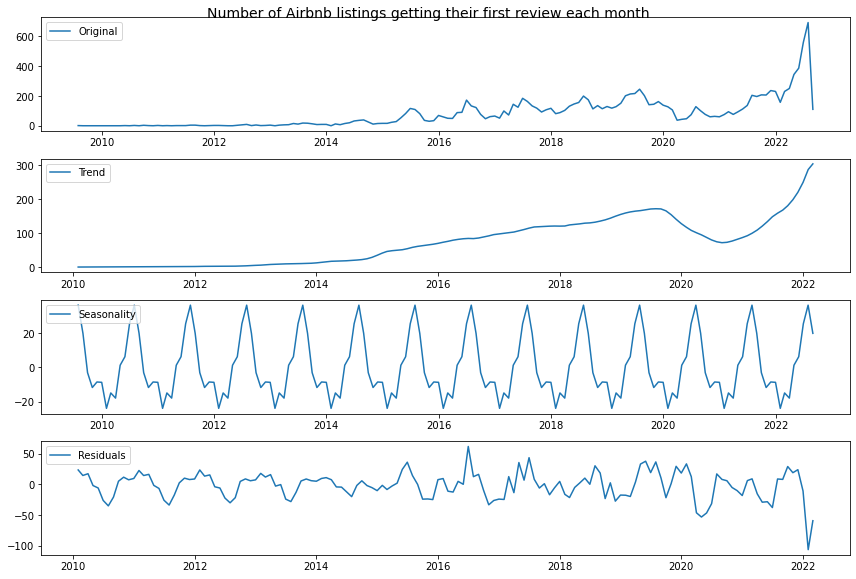

In [ ]:
decompose_time_series(ts_first_review, title='Number of Airbnb listings getting their first review each month')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


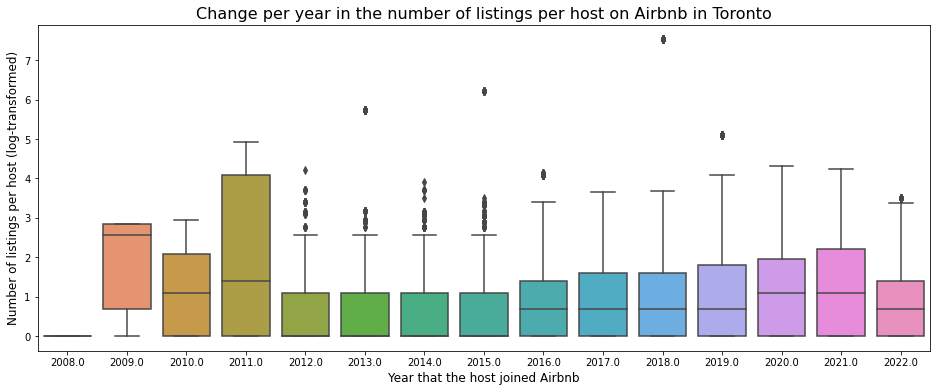

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(df_lst_full.host_since.dt.year, np.log(df_lst_full.host_listings_count))
plt.xlabel('Year that the host joined Airbnb', fontsize=12)
plt.ylabel('Number of listings per host (log-transformed)', fontsize=12)
plt.title('Change per year in the number of listings per host on Airbnb in Toronto', fontsize=16)
plt.show()

In [ ]:
print("Average number of listings per host per year on Airbnb in Toronto:")
print(round(df_lst_full.set_index('host_since').host_listings_count.resample('YS').mean(),2))

Average number of listings per host per year on Airbnb in Toronto:
host_since
2008-01-01     1.00
2009-01-01    10.21
2010-01-01     5.94
2011-01-01    40.87
2012-01-01     4.39
2013-01-01    22.72
2014-01-01     3.70
2015-01-01     6.75
2016-01-01     4.60
2017-01-01     5.20
2018-01-01    50.20
2019-01-01     9.92
2020-01-01     7.08
2021-01-01    10.36
2022-01-01     4.06
Name: host_listings_count, dtype: float64


In [ ]:
# List of the largest host_listings_count and the year the host joined Airbnb
df_lst_full.sort_values('host_listings_count').drop_duplicates('host_listings_count',keep='last').tail(10)[['host_since', 'host_listings_count']]

,host_since,host_listings_count
id,,
52281127,2016-02-23,62.0
2641884,2012-05-12,68.0
701371620634257530,2021-08-03,70.0
703809019922857769,2020-05-17,75.0
54261522,2011-07-06,136.0
550190887112368964,2019-06-17,162.0
51314790,2013-11-23,310.0
47894901,2015-07-14,504.0
656292951493946264,2018-02-22,1853.0


**Numerical Data Analysis**

In [ ]:
df_lst_full.describe()

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_days_active,time_since_first_review
count,16034.000000,16033.000000,16033.000000,16033.000000,16035.000000,16035.000000,16035.000000,0.0,16035.000000,16035.000000,...,12498.000000,12500.000000,12498.000000,12498.000000,12497.000000,12498.000000,16035.000000,12640.000000,16035.000000,12640.000000
mean,0.219471,12.737978,0.988711,0.869831,43.684916,-79.396946,3.134705,NaN,1.460992,1.714312,...,4.783604,4.694359,4.832268,4.837756,4.815481,4.684034,0.301278,1.445146,850.176239,-125.260522
std,0.413901,95.923903,0.105653,0.336500,0.052253,0.071079,2.058079,NaN,0.844028,1.088691,...,0.409463,0.474610,0.378197,0.389029,0.341235,0.449793,0.458828,1.900710,1042.207311,873.558271
min,0.000000,1.000000,0.000000,0.000000,43.573810,-79.653650,0.000000,NaN,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.010000,-1246.000000,-1247.000000
25%,0.000000,1.000000,1.000000,1.000000,43.646021,-79.426990,2.000000,NaN,1.000000,1.000000,...,4.740000,4.600000,4.820000,4.830000,4.760000,4.600000,0.000000,0.190000,59.500000,-971.000000
50%,0.000000,2.000000,1.000000,1.000000,43.664550,-79.396650,2.000000,NaN,1.000000,1.000000,...,4.910000,4.840000,4.950000,4.960000,4.920000,4.800000,0.000000,0.670000,938.000000,-143.000000
75%,0.000000,4.000000,1.000000,1.000000,43.710365,-79.373120,4.000000,NaN,2.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.950000,1.000000,2.000000,1553.000000,530.000000
max,1.000000,1853.000000,1.000000,1.000000,43.860710,-79.102200,16.000000,NaN,9.000000,16.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,13.470000,3896.000000,3519.000000


In [ ]:
print(f"Prices range from {min(df.price)} to {max(df.price)}.")

Prices range from 0 to 13164.


**Host Listings Count**

In [ ]:
print("Median number of listings per host:", int(df_lst_full.host_listings_count.median()))
print("Mean number of listings per host:", int(round(df_lst_full.host_listings_count.mean())))
print(f"{int(round(100*len(df_lst_full[df_lst_full.host_listings_count == 1])/len(df_lst_full)))}% of listings are from hosts with one listing.")

Median number of listings per host: 2
Mean number of listings per host: 13
47% of listings are from hosts with one listing.


**Accomodation**

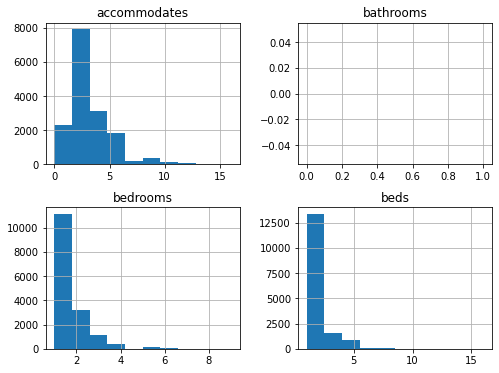

In [ ]:
df_lst_full[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(8,6));

**Categorical Features Analysis**

In [ ]:
map_df = gpd.read_file('/content/neighbourhoods.geojson')
map_df.head()

,neighbourhood,neighbourhood_group,geometry
0,York University Heights,None,"MULTIPOLYGON (((-79.50529 43.75987, -79.50488 ..."
1,The Beaches,None,"MULTIPOLYGON (((-79.31485 43.66674, -79.31356 ..."
2,Scarborough Village,None,"MULTIPOLYGON (((-79.21397 43.72676, -79.21400 ..."
3,South Parkdale,None,"MULTIPOLYGON (((-79.42777 43.62979, -79.42948 ..."
4,South Riverdale,None,"MULTIPOLYGON (((-79.32868 43.64745, -79.32867 ..."


In [ ]:
# Dropping the empty column
map_df.drop('neighbourhood_group', axis=1, inplace=True)

# Creating a dataframe of listing counts and median price by borough
temp_df = pd.DataFrame(df_lst_full.groupby('neighbourhood_cleansed').size())
temp_df.rename(columns={0: 'number_of_listings'}, inplace=True)
temp_df['median_price'] = df_lst_full.groupby('neighbourhood_cleansed').price.median().values

# Joining the dataframes
temp_df = map_df.set_index('neighbourhood').join(temp_df)

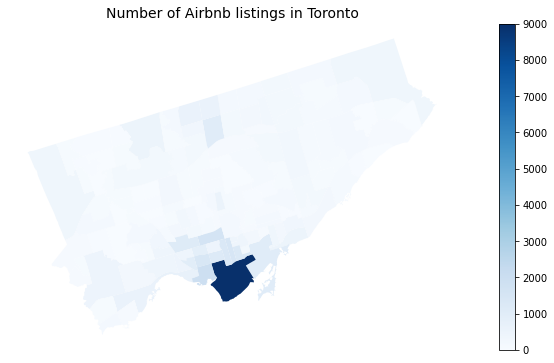

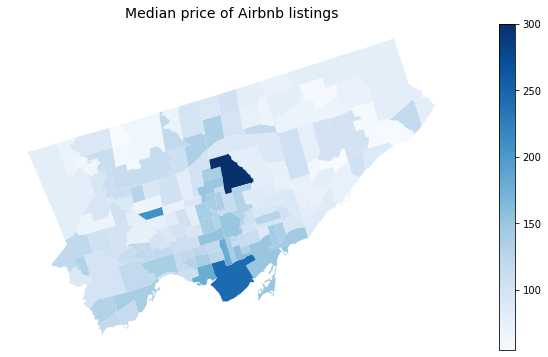

In [ ]:
# Plotting the number of listings in each borough
fig1, ax1 = plt.subplots(1, figsize=(15, 6))
temp_df.plot(column='number_of_listings', cmap='Blues', ax=ax1)
ax1.axis('off')
ax1.set_title('Number of Airbnb listings in Toronto', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=9000))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

# Plotting the median price of listings in each borough
fig2, ax2 = plt.subplots(1, figsize=(15, 6))
temp_df.plot(column='median_price', cmap='Blues', ax=ax2)
ax2.axis('off')
ax2.set_title('Median price of Airbnb listings', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(temp_df.median_price), vmax=max(temp_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()

In [ ]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    df_lst_full.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    df_lst_full.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price')
    ax2.set_xlabel('')
    
    plt.show()

**Superhosts**

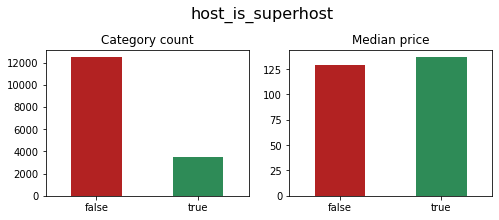

0.0    0.780529
1.0    0.219471
Name: host_is_superhost, dtype: float64


In [ ]:
binary_count_and_price_plot('host_is_superhost')
print(df_lst_full.host_is_superhost.value_counts(normalize=True))

**Host Verification**

In [ ]:
df_lst_full.host_identity_verified.value_counts(normalize=True)

1.0    0.869831
0.0    0.130169
Name: host_identity_verified, dtype: float64

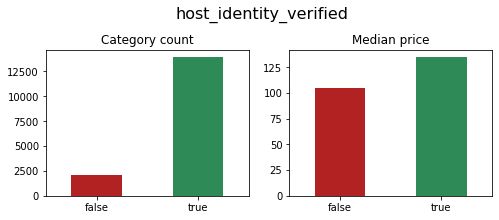

In [ ]:
binary_count_and_price_plot('host_identity_verified')